# State of San Diego Infrastructure
##### COGS 108 Final Project by : Anaelle Kim, Grant Sheagley, Dylan Christiano, Shawn Le

In [1]:
# Imports: Tools we will need to use for cleaning and analysis of question
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import re 
import difflib 

## Background

The background of our research question originates from each members' inherent interest in the prevalence of Motor Vehicle Accidents (MVA) within the United States as a whole. Considering the fact that there is such a high prevalence of MVAs in the US, it was hard for each of us within this research group to not question why this might occur in the first place. As soon as we identified the fact that this is the research question we would be investigating from the perspective of data science, we immediately started looking for any public information regarding MVAs, but more specifically, MVAs within the city of San Diego. After some deep research, we were able to find said data, and from these sources, we started to build up on our ideas regarding how we would analyze and integrate the data into a presentable form.

## Research Question

Our research question concerns the following: Are there implicit determinants of MVAs in the city of San Diego? In our project, we look into data regarding weather, infrastructural integrity, and the specific characteristics of the individuals involved in the accidents in question (e.g. were said individuals under the influence during the MVA).  

## Significance

Our research inherently deals with accidents that directly affect people in a way that is potentially harmful, not just to the infrastrucutre in San Diego, but also to the livelihood of the individuals involved in the accidents themselves. Any time there is a MVA, there is a chance that there is physical harm done, and that said physical harm may haven been partly due to the conditions surrounding the accident itself, such as potholes, poor lighting, etc. The importance we, as a group, see in this project is oriented around the possibility that doing data analysis and showing statistics on MVAs and their corresponding conditions could potentially reveal ways in which the San Diego can better prevent these accidents from occurring. For example, if we happen find a correlation between poor lighting and higher occurences of MVAs, then it may provide the initiative to investigate these areas and even potentially replace said lighting. Or if we happen to find an area of San Diego that has a high rate of MVAs while under the influence, then this could also be used to better gauge where there needs to be patrolling done to identify and prevent these forms of MVAs.

## Hypothesis

Our prediction as a group is that there will be a strong correlation between poor street conditions and MVAs (i.e. the more worse the street condition, the more MVA's there will be). We came to form this hypothesis as a byproduct of the inherent assumption that accidents are more probable in areas where the conditions at hand are less than optimal in creating an environment that ensures easier transportation. In other words, our hypothesis was formed simply because it seemed more logical to assume that poor conditions are more likely to hold accidents than conditions that do not have such poor conditions. These conditions will be defined by Overall Condition Index (OCI): 

"Good" street conditions are defined as follows: A street in this category has little or no cracking, minor potholes, or other distresses. It has excellent drivability and needs little maintenance or remedial repair. A street in good condition has an OCI rating between 70 and 100. 

"Fair" street conditions are defined as follows: A street in this category has moderate cracking, some minor potholes and has adequate drivability. It is typically in need of remedial repairs and a slurry seal. A street in fair condition has an OCI rating between 40 and 69. 

"Poor" conditions are defined as follows: A street in this category has severe cracking, numerous areas of failed pavement with possible sub base failure, and exhibits a rough ride. It qualifies for a comprehensive repair or a total reconstruction – meaning that a street may be replaced from the ground up if conditions warrant that effort. A street in poor condition has an OCI rating between 0 and 39. 

However, there is also the possibility that MVAs within San Diego have implications regarding a variety of different characteristics of the city itself. There may also be additional problems besides infrastructure, such as the nature of obtaining drivers licenses, or maybe even the state in which drivers are operating the vehicles themselves.

## Potential Solutions

There are many potential answers to the variety of different problems inherent within our research question. Having MVA's be strictly related to street conditions seems highly unlikely. Thus, our answers could be oriented around distributing more money towards things that improve infrastructure, or it could be dealing with issues regarding the nature of transportation (e.g. there needs to be more money put into public transportation). Or our answers could revolve around the potential issues oriented around the process of obtaining drivers licenses within the United States.

## Potential Confounds

There are a variety of potential confounds when it comes to our data project. When it comes to determining why accidents occur within San Diego, or even as a whole, we as a group could potentially be dealing with a lot more than just variables regarding time, age, and location. In fact, you could be dealing with the mentality inherent in American culture. For example, a variable that could affect the level of car crashes in San Diego could be oriented around the fact that Americans are inherently more attracted to the idea of owning and operating their own vehicles, in comparison to European culture, which is more heavily reliant on public transportation. Another potential confound could deal with the way in which motor vehicle companies have monopolized the way in which Americans travel in the first place. For example, General Motors bought out many forms of public transportation within the Los Angeles area, which inevitably forced residents to purchase vehicles instead of using public transportation. Regardless, the variables mentioned above would be extremely hard to do actual data analysis on, considering the fact that there really is not any kind of relevant data oriented around these two topics, despite the fact that they could be potentially influencing our research question.

## Research after Hypothesis:

If our hypothesis, which is that there will be a strong correlation between poor street conditions and MVAs, ends up being incorrect, then we as a group will investigate further into the nature of the incidents themselves. Rather than look into the infrastructure as a possible influence in MVAs in San Diego, we will end up investigating the other factors in which these MVAs occurred, and whether or not the MVAs were oriented in any way around whether or not operators of the vehicles were under the influence.

## Section 1: Loading and Cleaning the Data process

The main variable that we will judge whether or not a street is safe or not, is the OCI. From streets.sandiego.gov, 

The 100-point OCI rating system the City [San Diego] uses classifies streets into one of three categories:
Good - A street in this category has little or no cracking, minor potholes, or other distresses. It has excellent drivability and needs little maintenance or remedial repair. A street in good condition has an OCI rating between: 70 and 100.

Fair - A street in this category has moderate cracking, some minor potholes and has adequate drivability. It is typically in need of remedial repairs and a slurry seal. A street in fair condition has an OCI rating between:
40 and 69.

Poor - A street in this category has severe cracking, numerous areas of failed pavement with possible sub base failure, and exhibits a rough ride. It qualifies for a comprehensive repair or a total reconstruction – meaning that a street may be replaced from the ground up if conditions warrant that effort. A street in poor condition has an OCI rating between:
0 and 39.

In essence, we will be using this index to first investigate our hypothesis and find a possible correlation between street conditions [OCI] and motor vehicle accidents [Frequency]. Once we have evidence for or against our hypothesis, we can then move onto exploring other factors that contribute to MVAs.

We accomplish this by drawing OCI data and MVA collision data over a period of 5 years from the city of San Diego via their official website and combining them into a single dataframe to analyze. 

We can create this single dataframe by matching an OCI with the street in which an accident occured:

### Step A.
Creating the data frame by loading the collision data csv

In [2]:
col_name = ["COLLISION_DATE","COLLISION_TIME","PRIMARY_RD","SECONDARY_RD","CHP_BEAT_TYPE","WEATHER_1","COLLISION_SEVERITY","PRIMARY_COLL_FACTOR","PCF_VIOL_CATEGORY","LIGHTING","ROAD_SURFACE","ROAD_COND_1"]
MVA_DF = pd.DataFrame(data=None, index=None, columns=col_name, dtype=None) #New empty dataframe
size = 0
for i in range (1):
    year = 2015 #File name
    DF = pd.read_csv('CollisionRecords_%i.csv' % year,sep = '\t', dtype='unicode') #Read the csv file
    DF = DF[col_name]
    size += len(DF) #Check size matches 
    MVA_DF = MVA_DF.append(DF)#Add DF to our initialized dataframe

print(size) # Checking Size

10075


### Step B.
Creating the data frame by loading oci data csv

In [3]:
year = 2011
DF_OCI = pd.read_csv('OCI_SD_%i.csv' % year,sep = ',', dtype='unicode') #Read the csv file
DF_OCI= DF_OCI[['oci','street','street_from','street_to','oci_desc']] #Keep only relevant variables
DF_OCI

,oci,street,street_from,street_to,oci_desc
0,49.23,TEBO CT,PICADOR BL,ROBB ROY PL,Fair
1,35.32,04TH AV,K ST,J ST,Poor
2,78.48,MELBOURNE DR,SHAWN AV,IRVINGTON AV,Good
3,34.29,BAYARD ST,REED AV,THOMAS AV,Poor
4,28.28,QUINCE DR,06TH AV,QUINCE ST,Poor
5,75.72,PRINCESS ST,SPINDRIFT DR,CITY BOUNDARY,Good
6,83.43,CLAVELITA ST,ARLISS CT,DEL SUR BL,Good
7,100,IRIS AV,ALBATA CT,ROCHDALE LN,Good
8,51.55,ARLISS CT,CLAVELITA ST,END,Fair
9,45.26,K ST,19TH ST,20TH ST,Fair


### Step C.
Cleaning the data: removing things such as highways and accidents that did not occur on a street of the offical OC. We do this to keep consistency with the datasets.  

In [4]:
#Function to aply multiple conditions/regexp on string
def multiple_replace(dico, name_street):
  # Create a regular expression  from the dictionary keys
  regex = re.compile("(%s)" % "|".join(map(re.escape, dico.keys())))

  # For each match, look-up corresponding value in dictionary
  return (regex.sub(lambda mo: dico[mo.string[mo.start():mo.end()]], name_street) )

In [5]:
#MVA_DF put the street names in the closest format from the OCI dataset

pattern_digitAV = re.compile("^(^[0-9])([A-Z].*)") #If start with one digit and followed by str
dico = {"HWY" : "HY", "RT " : "I-","INTERSTATE ": "I-","STATE ROUTE ": "ST-"} 
for i in range(len(MVA_DF)) : #When finished, len(DF)
    #print("ONE  : ",(MVA_DF["PRIMARY_RD"])[i]," Intersection : ",(MVA_DF["SECONDARY_RD"])[i])
    (MVA_DF["PRIMARY_RD"])[i] = multiple_replace(dico,(MVA_DF["PRIMARY_RD"])[i]) #Get the street name
    (MVA_DF["SECONDARY_RD"])[i] = multiple_replace(dico,(MVA_DF["SECONDARY_RD"])[i]) #Get intersection 
    digit_AV_street = pattern_digitAV.match((MVA_DF["PRIMARY_RD"])[i]) # Check if match with pattern
    digit_AV_Inter =pattern_digitAV.match((MVA_DF["SECONDARY_RD"])[i]) # Check if match with pattern
    if digit_AV_Inter is not None : 
        (MVA_DF["SECONDARY_RD"])[i]= "0" + digit_AV_Inter.group()    #Add a 0 in front if match
    if digit_AV_street is not (None):
        (MVA_DF["PRIMARY_RD"])[i] = "0" + digit_AV_street.group() #Add a 0 in front if match
        
MVA_DF = MVA_DF.loc[MVA_DF.PCF_VIOL_CATEGORY != '1'] #If driving under drugs or alcohol
MVA_DF = MVA_DF[~(MVA_DF.PRIMARY_RD.str.startswith('I-'))] #Take off the accidents owhen on the main Interstates road but not if at intersection
MVA_DF = MVA_DF[~(MVA_DF.PRIMARY_RD.str.startswith('SR-'))] #Take off the accidents on State Routes (not in OCI df)

MVA_DF= MVA_DF.reset_index(drop=True)
MVA_DF

,COLLISION_DATE,COLLISION_TIME,PRIMARY_RD,SECONDARY_RD,CHP_BEAT_TYPE,WEATHER_1,COLLISION_SEVERITY,PRIMARY_COLL_FACTOR,PCF_VIOL_CATEGORY,LIGHTING,ROAD_SURFACE,ROAD_COND_1
0,20150424,2235,01ST AV,W JUNIPER ST,0,B,1,A,3,C,B,H
1,20150428,2008,SEA WORLD DR,MISSION BAY DR,0,A,1,A,11,E,A,H
2,20150430,1418,DEL MAR TRAILS RD,MONA LISA ST,0,A,1,A,10,A,A,H
3,20150714,1831,GRAMERCY DR,TOWSER ST,0,A,1,A,8,A,A,H
4,20150629,2145,SOUTH 32ND ST,S 32ND ST 500,0,A,1,A,3,C,A,H
5,20150715,2129,INGRAHAM ST,DANA LANDING RD,0,A,1,A,11,C,A,H
6,20150813,1823,NAVAJO RD,GOLFCREST DR,0,A,1,A,12,A,A,H
7,20150822,730,FRIARS RD,PACIFIC HY,0,A,1,A,8,A,A,H
8,20150831,1726,GRAND AV,DAWES ST,0,A,1,A,10,A,A,H
9,20150830,1608,CARMEL MOUNTAIN RD,CARMEL CREEK RD,0,A,1,A,3,A,A,H


### Step D.
This is where we merge the data between the OCI and the MVA collision data into a single dataframe

In [6]:
#To be changed - Instead of looping wanted to merge on street name but don't think its possible - So we should make multiple conditions for determining if street + intersection corresponds to the right OCI
#If we have info on To or From  - look directly into the right street-to or street_from - 
#Otherwise, if double answers, check if same OCI_desc - if same just add it - Otherwise should we include it or just exclude these cases ? 

TEMP = pd.DataFrame(data=None, index=None, columns= None, dtype=None) #New empty dataframe
TEMP2 = pd.DataFrame(data=None, index=None, columns= None, dtype=None) #New empty dataframe
DF = pd.DataFrame(data=None, index=None, columns= None, dtype=None) #New empty dataframe
street_len = 0
intersection_len = 0

for i in range(400) : 
    street_name = (MVA_DF["PRIMARY_RD"])[i]
    intersection = (MVA_DF["SECONDARY_RD"])[i]
    
    TEMP = DF_OCI.loc[(DF_OCI['street'].str.contains(street_name))]
    
    if TEMP.empty:
        Close_Match_Street = (difflib.get_close_matches(street_name, (DF_OCI['street']),n=1))
        print("Close_M_S : ", Close_Match_Street)
        if (Close_Match_Street != []) : 
            TEMP = DF_OCI.loc[DF_OCI['street'].str.contains(Close_Match_Street[0])]
        else :
            print("No street match")
            print("Street : ",street_name," Intersection : ",intersection)
            street_len = street_len +1
            
    else :
        TEMP2 = TEMP.loc[(TEMP['street_from'] == intersection)|(TEMP['street_to']==(intersection))]  
        if TEMP2.empty : 
            Close_Match_Intersection = (difflib.get_close_matches(intersection, (TEMP['street_from']),n=1))
            Close_Match_To = (difflib.get_close_matches(intersection, (TEMP['street_to']),n=1))
            if (Close_Match_Intersection != []) & (Close_Match_To != []) : 
                TEMP2 = TEMP.loc[(TEMP['street_from'] == Close_Match_Intersection[0])|(TEMP['street_to']== Close_Match_To[0])]
            elif (Close_Match_Intersection != []) : 
                TEMP2 = TEMP.loc[(TEMP['street_from'] == Close_Match_Intersection[0])]
            elif (Close_Match_To != []) : 
                TEMP2 = TEMP.loc[(TEMP['street_to'] == Close_Match_To[0])]
            else : 
                print("No street_from match")
                print("Street : ",street_name," Intersection : ",intersection)
                intersection_len = intersection_len +1
                
        
        TEMP2= TEMP2.reset_index(drop=True)
        length = len(TEMP2)
        if length ==1 :
            DF = DF.append(TEMP2)
        elif length ==2 : 
            if (TEMP2['oci_desc'])[0] == (TEMP2['oci_desc'])[1]:
                DF = DF.append(TEMP2.loc[[1]])
        elif length >2 :
            print("CAS A DETERMINER")
  

CAS A DETERMINER
Close_M_S :  ['S 32ND ST']
Close_M_S :  ['CARMEL MTN RD']
No street_from match
Street :  GENESEE AV  Intersection :  CENTURION SQ
Close_M_S :  ['CLAIREMONT DR']
Close_M_S :  ['OTAY MESA RD']
Close_M_S :  ['CAM DE LA PLAZA']
Close_M_S :  ['PAMO AV']
Close_M_S :  ['OCEAN VIEW BL']
Close_M_S :  ['BLACK MTN RD']
No street_from match
Street :  CABLE ST  Intersection :  CABLE ST 1783
Close_M_S :  ['LA JOLLA PY']
No street_from match
Street :  BERNARDO CENTER DR  Intersection :  I-15
Close_M_S :  ['E SAN YSIDRO BL']
Close_M_S :  ['BLACK MTN RD']
Close_M_S :  ['GRIBBLE ST']
Close_M_S :  ['PAMO AV']
No street_from match
Street :  HOWARD AV  Intersection :  SAN YSIDRO BL
Close_M_S :  ['CARMEL MTN RD']
CAS A DETERMINER
No street_from match
Street :  58TH ST  Intersection :  58TH ST 4000
Close_M_S :  ['LA JOLLA SCENIC S DR']
Close_M_S :  ['CAM DE LA REINA']
CAS A DETERMINER
No street_from match
Street :  UNIVERSITY AV  Intersection :  UNIVERSITY AV 5000
Close_M_S :  ['TED WILLIAMS

### Step E
Checking the new dataframe and resetting the index to reorder the data cells

In [7]:
DF = DF.reset_index(drop=True)
DF

,oci,street,street_from,street_to,oci_desc
0,80.26,01ST AV,IVY ST,JUNIPER ST,Good
1,76.33,GRAMERCY DR,GREYLING DR,TOWSER ST,Good
2,68.95,GRAND AV,DAWES ST,EVERTS ST,Fair
3,52.59,EL CAJON BL,ALTADENA AV,51ST ST,Fair
4,83.16,RANCHO BERNARDO RD,BERNARDO CENTER DR,ACENA DR,Good
5,60.58,DEL SOL BL,BEYER WY,DEL SOL LN,Fair
6,80,RICHMOND ST,ESSEX ST,UNIVERSITY AV,Good
7,55.99,UNIVERSITY AV,MENLO AV,47TH ST,Fair
8,39,BACON ST,CORONADO AV,SANTA CRUZ AV,Poor
9,59.62,MIRAMAR RD,MIRAMAR ML,MIRAMAR PL,Fair


In [8]:
DF = pd.read_csv('Final_DF.csv') ## Dataframe we will use for the analysis

## Section 2: Preliminary Data Analytics
This section will used to quickly check values and poke around the new dataframe. Not committal to analysis.

In [9]:
DF.head()

,Unnamed: 0,oci,street,street_from,street_to,oci_desc,COLLISION_DATE,COLLISION_TIME,PRIMARY_RD,SECONDARY_RD,CHP_BEAT_TYPE,WEATHER_1,COLLISION_SEVERITY,PRIMARY_COLL_FACTOR,PCF_VIOL_CATEGORY,LIGHTING,ROAD_SURFACE,ROAD_COND_1
0,0,39.67,EL PASEO GRANDE,CALLE CLARA,VALLECITOS,Poor,20111003,1810,EL PASEO GRANDE,CALLE CLARA,0,B,3,A,13,A,A,H
1,1,86.43,MONTEZUMA RD,COLLWOOD BL,YERBA SANTA DR,Good,20110427,1420,MONTEZUMA RD,YERBA SANTA RD,0,A,3,A,08,A,A,H
2,2,51.44,MIRAMAR RD,BLACK MTN RD,KEARNY VILLA RD,Fair,20110518,1030,MIRA MAR RD,KEARNY VILLA RD,0,A,4,A,12,A,A,H
3,3,65.88,EL CAJON BL,46TH ST,46TH ST,Fair,20110530,1738,EL CAJON BL,36TH ST,0,A,2,A,03,A,A,H
4,4,51.34,MONROE AV,MISSION AV,ALABAMA ST,Fair,20110529,2237,MONROE AV,ALABAMA ST,0,A,3,A,08,C,A,H


In [10]:
DF.tail()

,Unnamed: 0,oci,street,street_from,street_to,oci_desc,COLLISION_DATE,COLLISION_TIME,PRIMARY_RD,SECONDARY_RD,CHP_BEAT_TYPE,WEATHER_1,COLLISION_SEVERITY,PRIMARY_COLL_FACTOR,PCF_VIOL_CATEGORY,LIGHTING,ROAD_SURFACE,ROAD_COND_1
6368,6368,61.10,ENRICO FERMI DR,MARCONI DR,VIA DE LA AMISTAD,Fair,20141217,1205,ENRICO FERMI DR,MARCONI DR,0,A,0,A,08,A,A,H
6369,6369,42.48,NORTH HARBOR DR,N HARBOR DR RA,SCOTT ST,Fair,20140307,520,NORTH HARBOR DR,HARBOR ISLAND DR,0,A,4,A,08,B,-,H
6370,6370,58.41,OBERLIN DR,SCRANTON RD,YOUNGSTOWN WY,Fair,20140213,1310,OBERLIN DR,SCRANTON RD,0,A,4,A,12,A,A,H
6371,6371,100.00,01ST AV,BEECH ST,CEDAR ST,Good,20141023,1311,01ST AV,CEDAR ST,0,A,3,A,-,A,A,H
6372,6372,61.51,CAM DEL RIO WEST,I-5 SB OFF RA,HANCOCK ST,Fair,20141204,1038,CAMINO DEL RIO W,HANCOCK ST,0,A,4,-,-,A,A,H


In [11]:
DF.WEATHER_1.value_counts()

A    5264
B     948
C      88
-      37
E      23
F      13
Name: WEATHER_1, dtype: int64

In [12]:
DF.LIGHTING.value_counts()

A    4229
C    1696
B     220
D     170
-      46
E      12
Name: LIGHTING, dtype: int64

In [13]:
DF.PCF_VIOL_CATEGORY.value_counts() 

08    1344
03    1170
09    1068
12     754
04     355
11     330
10     289
-      258
21     212
05     139
00     116
17     109
18      72
06      47
07      37
22      35
01      19
13      10
15       3
16       3
14       2
02       1
Name: PCF_VIOL_CATEGORY, dtype: int64

In [14]:
DF.PRIMARY_COLL_FACTOR.value_counts() 

A    6098
D     104
C      72
-      64
B      35
Name: PRIMARY_COLL_FACTOR, dtype: int64

In [15]:
DF.loc[(DF['PRIMARY_COLL_FACTOR'] == 'A')]

,Unnamed: 0,oci,street,street_from,street_to,oci_desc,COLLISION_DATE,COLLISION_TIME,PRIMARY_RD,SECONDARY_RD,CHP_BEAT_TYPE,WEATHER_1,COLLISION_SEVERITY,PRIMARY_COLL_FACTOR,PCF_VIOL_CATEGORY,LIGHTING,ROAD_SURFACE,ROAD_COND_1
0,0,39.67,EL PASEO GRANDE,CALLE CLARA,VALLECITOS,Poor,20111003,1810,EL PASEO GRANDE,CALLE CLARA,0,B,3,A,13,A,A,H
1,1,86.43,MONTEZUMA RD,COLLWOOD BL,YERBA SANTA DR,Good,20110427,1420,MONTEZUMA RD,YERBA SANTA RD,0,A,3,A,08,A,A,H
2,2,51.44,MIRAMAR RD,BLACK MTN RD,KEARNY VILLA RD,Fair,20110518,1030,MIRA MAR RD,KEARNY VILLA RD,0,A,4,A,12,A,A,H
3,3,65.88,EL CAJON BL,46TH ST,46TH ST,Fair,20110530,1738,EL CAJON BL,36TH ST,0,A,2,A,03,A,A,H
4,4,51.34,MONROE AV,MISSION AV,ALABAMA ST,Fair,20110529,2237,MONROE AV,ALABAMA ST,0,A,3,A,08,C,A,H
5,5,78.45,EUCLID AV,ELM ST,WESTOVER PL,Good,20110103,1730,EUCLID AV,WESTOVER ST,0,B,4,A,03,C,A,H
6,6,78.80,MISSION BL,SAN RAFAEL PL,VENICE CT,Good,20110103,1010,MISSION BL,SAN RAFAEL,0,B,4,A,03,A,A,H
7,7,51.00,SAN DIEGO MISSION RD,MISSION VILLAGE DR,RANCHO MISSION RD,Fair,20110101,1856,SAN DIEGO MISSION RD,RANCHO MISSION,0,A,4,A,03,B,A,H
8,8,54.34,MIRAMAR RD,CABOT DR,CAM RUIZ,Fair,20110104,2356,MIRAMAR RD,CAMINO RUIZ,0,A,3,A,09,C,A,H
9,9,43.86,FAIRMOUNT AV OFF RA,FAIRMOUNT AV,END,Fair,20110104,1441,FAIRMOUNT AV,FAIRMOUNT AV 4400,0,A,4,A,08,A,A,H


## Section 3: Data Analysis

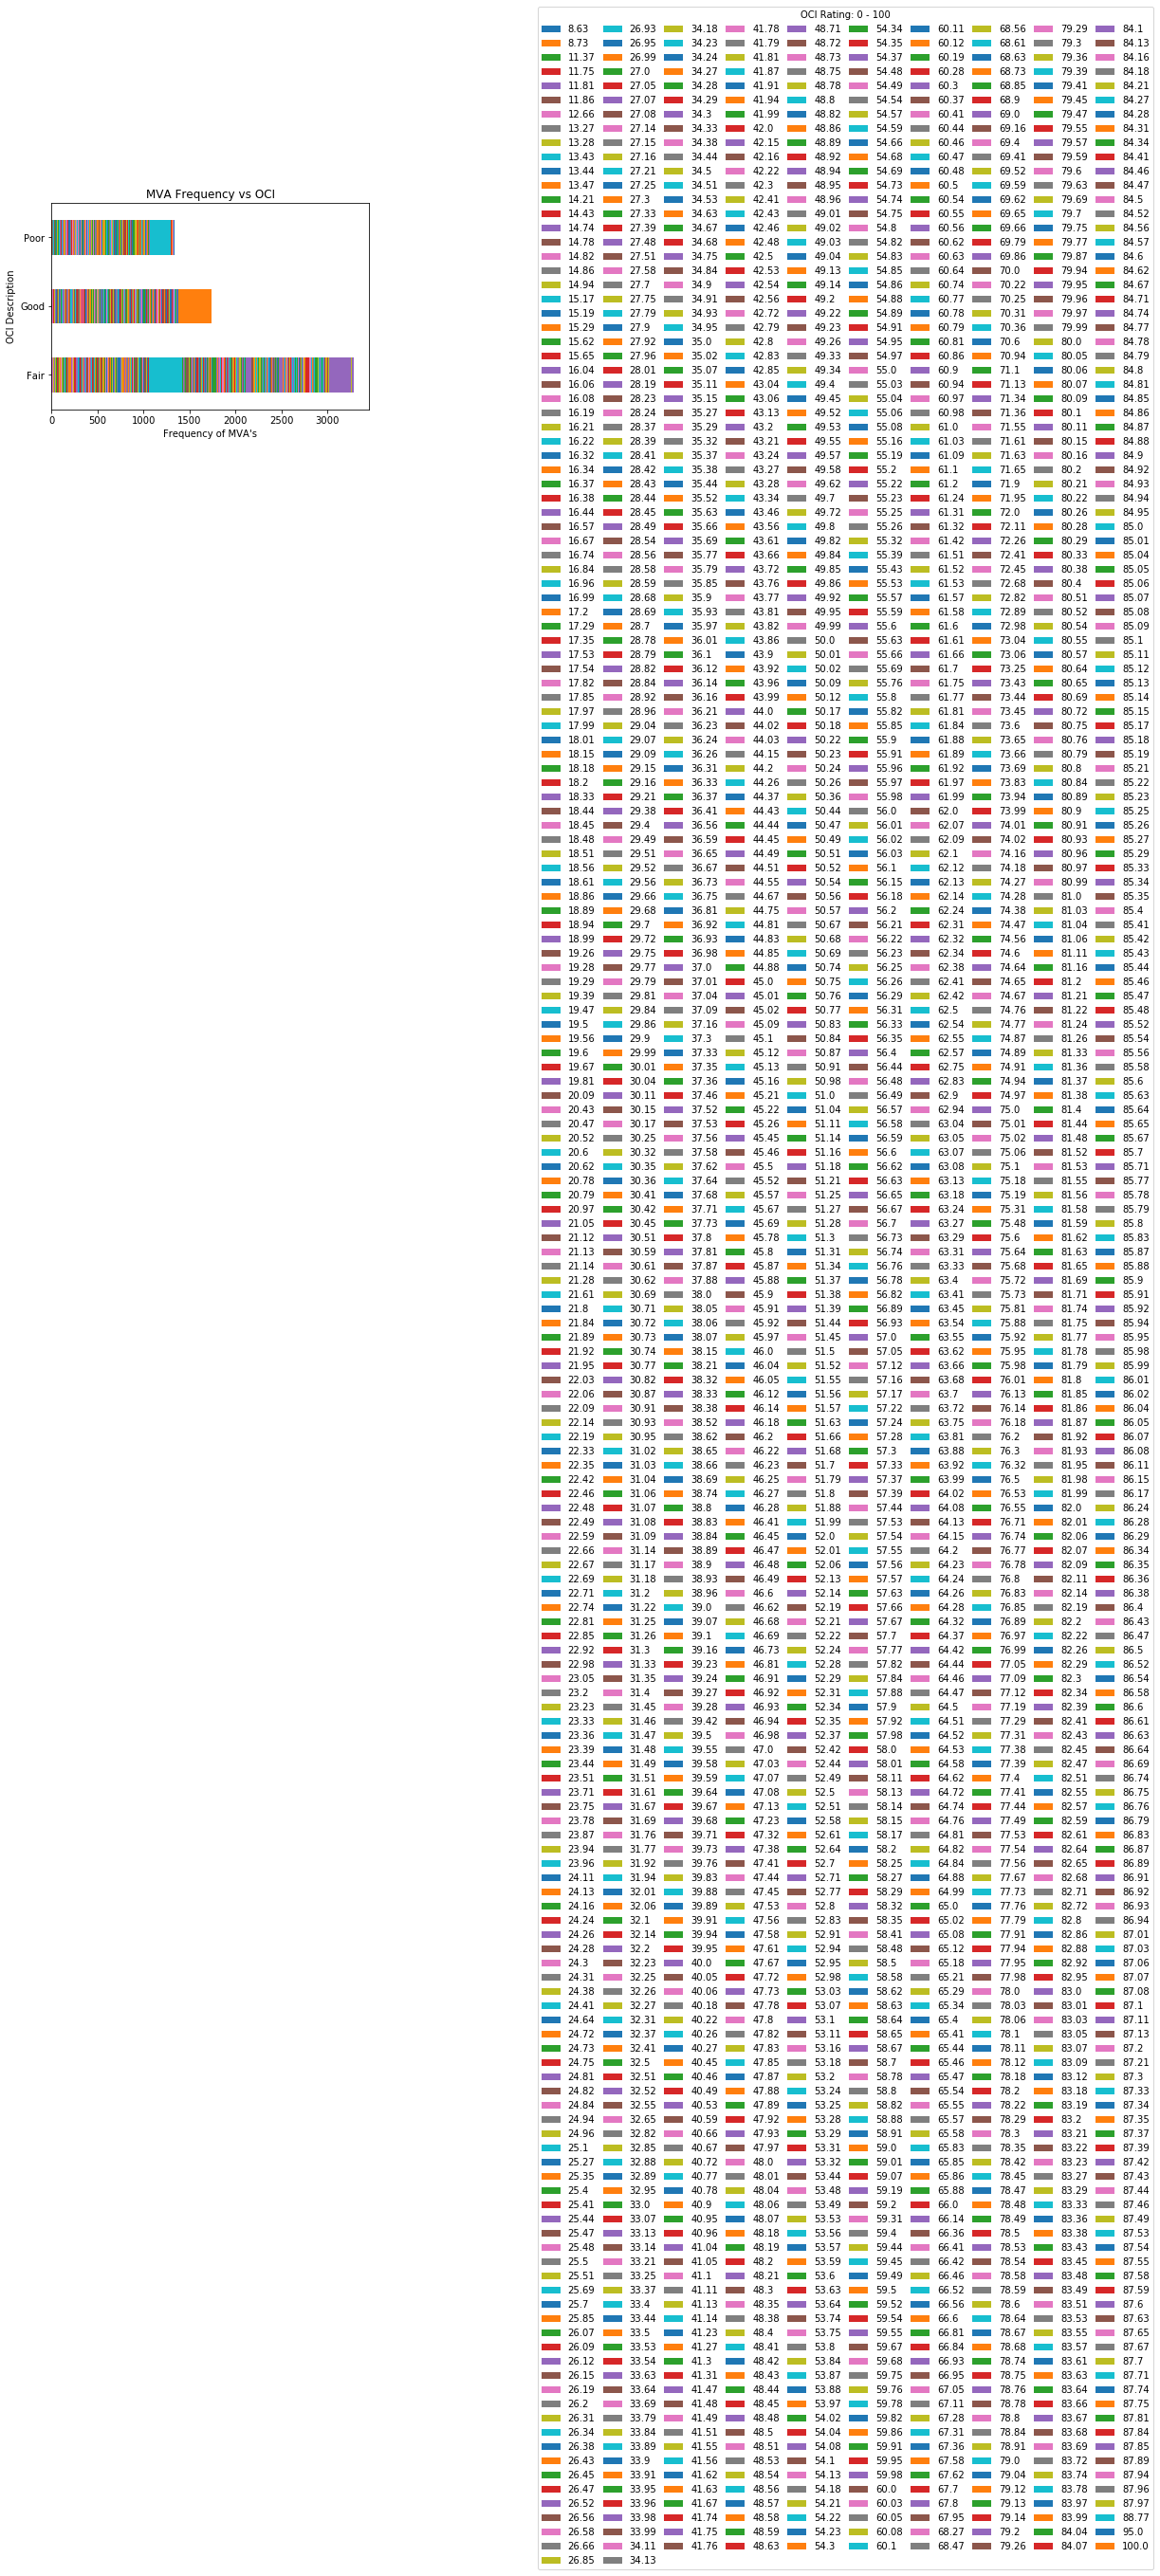

In [16]:
# First visualization of data
pd.crosstab(DF.oci_desc, DF.oci).plot.barh(title = "MVA Frequency vs OCI", stacked = True)
plt.xlabel("Frequency of MVA's")
plt.ylabel("OCI Description")
plt.legend(title = 'OCI Rating: 0 - 100',
           bbox_to_anchor=(1.50, 0, 2, 2), loc = 2, ncol = 10, mode= "expand", borderaxespad=1)
plt.show()

### Observation 1
We first try to find evidence of any correlation between road conditions and possible motor vehicle accidents. In our hypothesis, we argued that there should be a strong correlation from the get go. To visualize this, we plotted the frequency of accidents that occured in each of the category description of OCI. 

The legend reflects the different OCIs and is ordered from least to greatest with the exception of 100. We can thus see each individual OCI adds up to the total amount of collisions in a single category. 

There is immediately a huge disparity in the frequency of MVAs when comparing the OCI Descriptions. We see that the amount of fair road accidents eclipse both good and fair accidents. This means that a huge proportion of accidents in our dataset must have occurred on "fair" quality roads. 

In [17]:
totals = len(DF.oci) # Get the dataframe

# Get the proportions
good_pro = 100 * (len(DF.loc[DF['oci_desc'] == 'Good']) / totals)
fair_pro = 100 * (len(DF.loc[DF['oci_desc'] == 'Fair']) / totals)
poor_pro = 100 * (len(DF.loc[DF['oci_desc'] == 'Poor']) / totals)

# Reporting
print("Out of: ", totals, "accidents")
print(good_pro, fair_pro, poor_pro)

Out of:  6373 accidents
27.334065589204453 51.6397301114075 21.026204299388045


### Observation 2
It turns out that of all the motor vehicle accidents in our dataset, about half of the MVAs occurred on streets with "fair" OCI rating. Furthermore, the amount of MVAs for "good" and "poor" rated streets are around the same proportions. This directly provides evidence to the contrary of our hypothesis and raises the question "Do street conditions even play a role in the causation of MVAs?" 

This leads us to believe that there must be other factors worth looking into that can explain the causation of these motor vehicle accidents rather than street conditions.

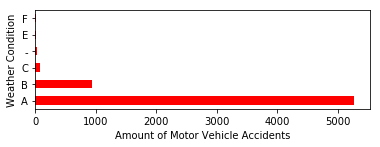

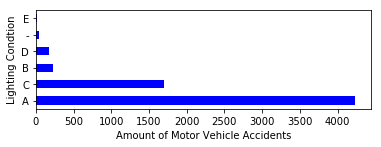

In [18]:
plt.subplot(2,1,1)
DF.WEATHER_1.value_counts().plot.barh(color = 'r')
plt.xlabel('Amount of Motor Vehicle Accidents')
plt.ylabel('Weather Condition')
plt.show()

plt.subplot(2,1,2)
DF.LIGHTING.value_counts().plot.barh(color = 'b')
plt.xlabel('Amount of Motor Vehicle Accidents')
plt.ylabel('Lighting Condtion')
plt.show()

### Observation 3
Since we have strong evidence against our hypothesis, we move into exploring other variables in our dataframe that could potentially cause MVAs. We examine factors such as lighting and weather conditions in this new case. We don't consider the collision factor because we are focusing on motor vehicle accidents.

Based on the Statewide Integrated Traffic Records System (SWITRS), a [legend] was re-engineered beginning with collisions dated January 2002.  As part of this re-engineering, they have changed the format of the raw data provided upon request to SWITRS data users:

Weather_1: the weather condition at the time of the collision

A - Clear
B - Cloudy
C - Raining
D - Snowing
E - Fog
F - Other
G - Wind
-- Not Stated

Lighting: The amount of light present at the collision

A - Daylight
B - Dusk - Dawn
C - Dark - Street Lights
D - Dark - No Street Lights
E - Dark - Street Lights Not Functioning
-- Not Stated

It seems that most of the MVA collisions occurred in either clear (A) or cloudy (B) weather, so weather doesn't appear to make a strong impact as we would expect. We move onto lighting and notice that not all accidents occurred in broad daylight. A sizeable portion of these collisions seem to appear at night with streetlights on (C). 


In [19]:
print(len(DF.loc[(DF['PCF_VIOL_CATEGORY'] == '08') & (DF['LIGHTING'] == 'C')]) / len(DF.loc[(DF['PCF_VIOL_CATEGORY'] == '08')]))
print(len(DF.loc[(DF['PCF_VIOL_CATEGORY'] == '03') & (DF['LIGHTING'] == 'C')]) / len(DF.loc[(DF['PCF_VIOL_CATEGORY'] == '03')]))
print(len(DF.loc[(DF['PCF_VIOL_CATEGORY'] == '09') & (DF['LIGHTING'] == 'C')]) / len(DF.loc[(DF['PCF_VIOL_CATEGORY'] == '09')]))

0.31845238095238093
0.26495726495726496
0.19756554307116106


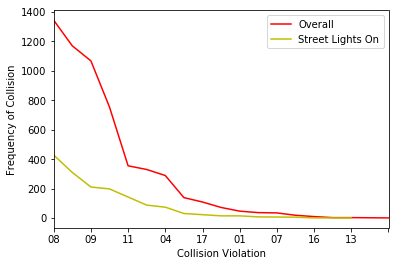

In [20]:
DF_EX4 = DF.loc[(DF['PCF_VIOL_CATEGORY'] == '08') 
                | (DF['PCF_VIOL_CATEGORY'] == '03')
                | (DF['PCF_VIOL_CATEGORY'] == '09') 
                | (DF['PCF_VIOL_CATEGORY'] == '12')
                | (DF['PCF_VIOL_CATEGORY'] == '04')
                | (DF['PCF_VIOL_CATEGORY'] == '11')
                | (DF['PCF_VIOL_CATEGORY'] == '10')
                | (DF['PCF_VIOL_CATEGORY'] == '05')
                | (DF['PCF_VIOL_CATEGORY'] == '17')
                | (DF['PCF_VIOL_CATEGORY'] == '18')
                | (DF['PCF_VIOL_CATEGORY'] == '06')
                | (DF['PCF_VIOL_CATEGORY'] == '07')
                | (DF['PCF_VIOL_CATEGORY'] == '22')
                | (DF['PCF_VIOL_CATEGORY'] == '01')
                | (DF['PCF_VIOL_CATEGORY'] == '13')
                | (DF['PCF_VIOL_CATEGORY'] == '16')
                | (DF['PCF_VIOL_CATEGORY'] == '15')
                | (DF['PCF_VIOL_CATEGORY'] == '14')
                | (DF['PCF_VIOL_CATEGORY'] == '02')]

DF_OB4 = DF.loc[(DF['PCF_VIOL_CATEGORY'] == '08') & (DF['LIGHTING'] == 'C') | 
                (DF['PCF_VIOL_CATEGORY'] == '03') & (DF['LIGHTING'] == 'C') | 
                (DF['PCF_VIOL_CATEGORY'] == '09') & (DF['LIGHTING'] == 'C') |
                (DF['PCF_VIOL_CATEGORY'] == '12') & (DF['LIGHTING'] == 'C') |
                (DF['PCF_VIOL_CATEGORY'] == '04') & (DF['LIGHTING'] == 'C') |
                (DF['PCF_VIOL_CATEGORY'] == '11') & (DF['LIGHTING'] == 'C') |
                (DF['PCF_VIOL_CATEGORY'] == '10') & (DF['LIGHTING'] == 'C') |
                (DF['PCF_VIOL_CATEGORY'] == '05') & (DF['LIGHTING'] == 'C') 
                | (DF['PCF_VIOL_CATEGORY'] == '17') & (DF['LIGHTING'] == 'C')
                | (DF['PCF_VIOL_CATEGORY'] == '18') & (DF['LIGHTING'] == 'C')
                | (DF['PCF_VIOL_CATEGORY'] == '06') & (DF['LIGHTING'] == 'C')
                | (DF['PCF_VIOL_CATEGORY'] == '07') & (DF['LIGHTING'] == 'C')
                | (DF['PCF_VIOL_CATEGORY'] == '22') & (DF['LIGHTING'] == 'C')
                | (DF['PCF_VIOL_CATEGORY'] == '01') & (DF['LIGHTING'] == 'C')
                | (DF['PCF_VIOL_CATEGORY'] == '13') & (DF['LIGHTING'] == 'C')
                | (DF['PCF_VIOL_CATEGORY'] == '16') & (DF['LIGHTING'] == 'C')
                | (DF['PCF_VIOL_CATEGORY'] == '15') & (DF['LIGHTING'] == 'C')
                | (DF['PCF_VIOL_CATEGORY'] == '14') & (DF['LIGHTING'] == 'C')
                | (DF['PCF_VIOL_CATEGORY'] == '02') & (DF['LIGHTING'] == 'C')] 


DF_EX4.PCF_VIOL_CATEGORY.value_counts().plot(color = 'r', label = 'Overall')
DF_OB4.PCF_VIOL_CATEGORY.value_counts().plot(color = 'y', label = 'Street Lights On')
plt.xlabel("Collision Violation")
plt.ylabel("Frequency of Collision")
plt.legend()
plt.show()

## Observation 4: 
We continue to investigate lighting and its impact on MVAs. However, we would need to consider the types of accidents that occurred as well. This is because we really don't know what lighting can do on a particular driver. Just because it's dark, it doesn't automatically mean people lose control of their vehicles due to vision problem. Thus, we need to analyze PCF_VIOL_CATEGORY, or why the collision occurred. Based on the Statewide Integrated Traffic Records System (SWITRS),

01 - Driving or Bicycling Under the Influence of Alcohol or Drug
02 - Impeding Traffic
03 - Unsafe Speed
04 - Following Too Closely
05 - Wrong Side of Road
06 - Improper Passing
07 - Unsafe Lane Change
08 - Improper Turning
09 - Automobile Right of Way
10 - Pedestrian Right of Way
11 - Pedestrian Violation
12 - Traffic Signals and Signs
13 - Hazardous Parking
14 - Lights
15 - Brakes
16 - Other Equipment
17 - Other Hazardous Violation
18 - Other Than Driver (or Pedestrian)
19 - Unknown
20 - Unknown
21 - Unsafe Starting or Backing
22 - Other Improper Driving
23 - Pedestrian or "Other" Under the Influence of Alcohol or Drug
24 - Fell Asleep
00 - Unknown
-- Not Stated

We can observe that the majority of the collision type accidents do not occur at night time. Common vehicular accidents such as Improper Turning, Unsafe Speed, and Right of Way accidents occur in the daytime. These are more technical issues that can be resolved by either training, practice, or being a safer driver in general. However, things such as DUI's, Unsafe Lane Changes, and Impeding traffic could possibly occur due to the driver not having great visibility whether personal or vehicular. 

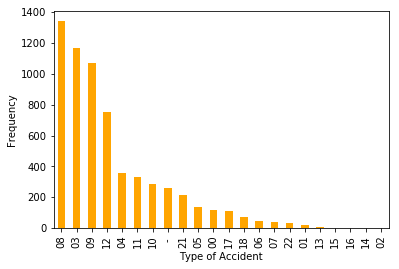

In [21]:
DF.PCF_VIOL_CATEGORY.value_counts().plot.bar(color = 'orange')
plt.xlabel('Type of Accident')
plt.ylabel('Frequency')
plt.show()

## Observation 5
Finally, since we have noticed that lighting does not play a significant role in major accidents, we decide to look at the types of accidents that occured. 08, 03, 09 are types of accidents that are most surely due to technical errors and can be corrected by preventative measures before a driver even touches the streets. We see lighting playing a role in the more smaller type accidents that require visibility. This is a point of interest that should be further investigated. Quality of the streets, however, are not a huge factor in MVAs. 

## Section 4: Discussion & Remarks